In [43]:
#데이터 불러오기
import pandas as pd

train = pd.read_csv("./train_data.csv", index_col=0)
test = pd.read_csv("./test_data.csv", index_col=0)
y = pd.read_csv("./y_data.csv", index_col=0)

In [32]:
feature_names = train.columns

In [33]:
#세팅
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
rc('font', family='Malgun Gothic')

c:\Users\sori4\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\sori4\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


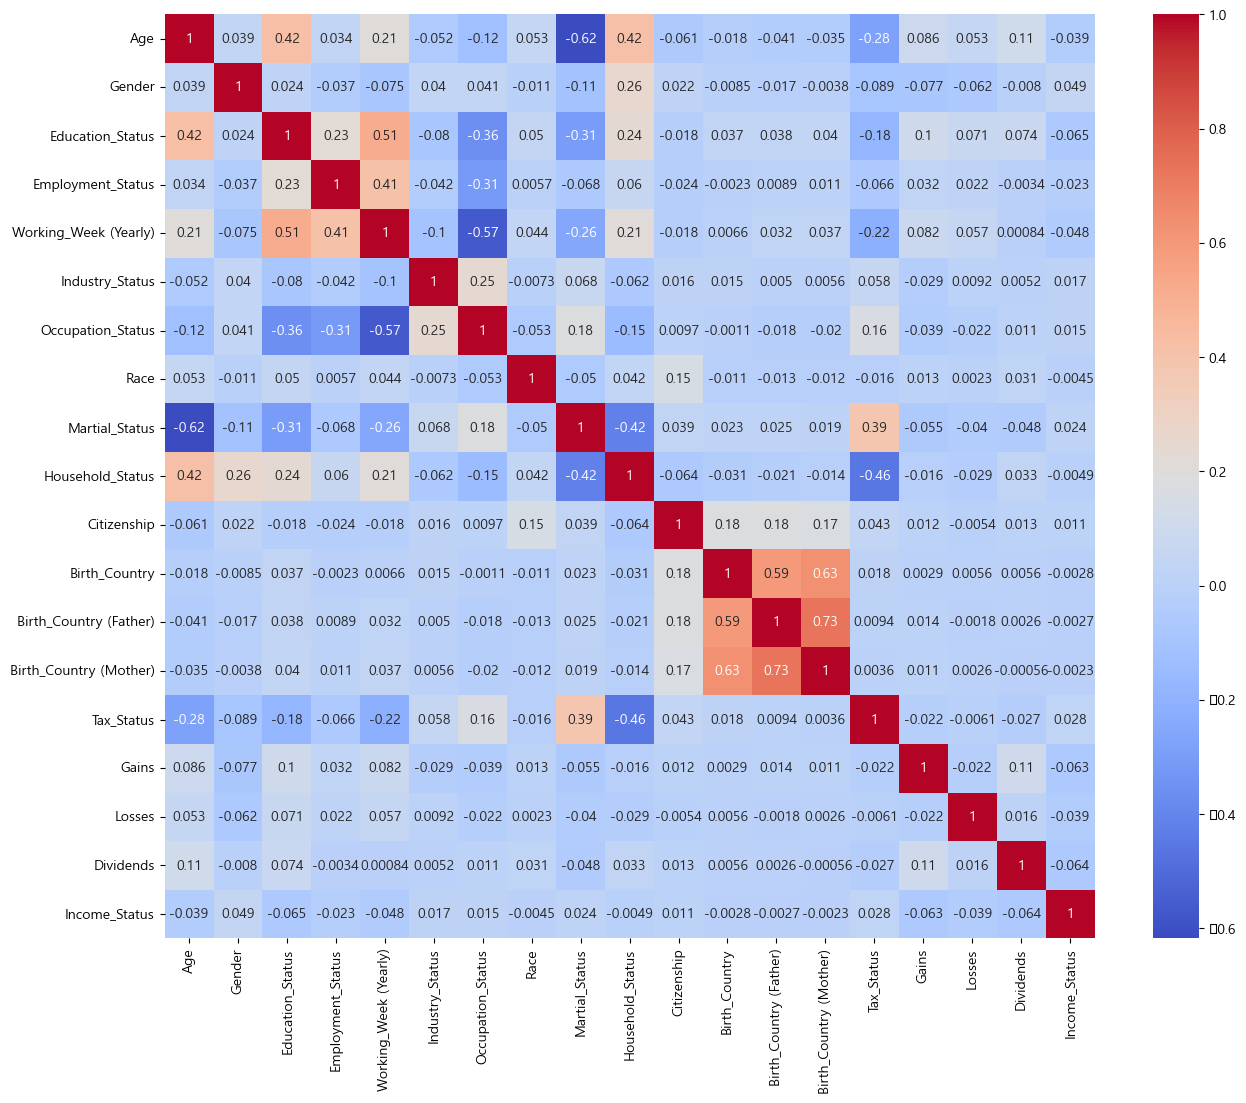

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()

### 스케일링

In [44]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(train)
train2 = scaler.transform(train)
test2 = scaler.transform(test)

In [45]:
train2

array([[ 1.20833333, -1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.125     , -1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.5       , -1.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.75      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29166667,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### 데이터 분리

In [46]:
from sklearn.model_selection import train_test_split

xtr, xval, ytr, yval = train_test_split(train2, y, test_size=0.2, random_state=123)

xtr.shape, xval.shape, ytr.shape, yval.shape

((15975, 19), (3994, 19), (15975, 1), (3994, 1))

### 회귀모델 진행

In [39]:
#결정트리 DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dt = DecisionTreeRegressor(random_state=123)
dt.fit(xtr, ytr)
yval_pred_dt = dt.predict(xval)

print("결정트리 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_dt)))
print("R2", r2_score(yval, yval_pred_dt))

결정트리 예측모델
RMSE 847.3268870122037
R2 -0.4884723346038593


In [38]:
#랜덤포레스트 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=123)
rf.fit(xtr, ytr)
yval_pred_rf = rf.predict(xval)

print("랜덤포레스트 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_rf)))
print("R2", r2_score(yval, yval_pred_rf))

c:\Users\sori4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


랜덤포레스트 예측모델
RMSE 618.139056905522
R2 0.20784318553440917


In [40]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

svc = SVC()
svc.fit(xtr, ytr)
yval_pred = svc.predict(xval)

print("SVC 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred)))
print("R2", r2_score(yval, yval_pred))

c:\Users\sori4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 예측모델
RMSE 887.6436107862517
R2 -0.6334884006470389


In [41]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(xtr, ytr)
yval_pred_xgb = xgb.predict(xval)

print("XGBoost 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred)))
print("R2", r2_score(yval, yval_pred))

XGBoost 예측모델
RMSE 887.6436107862517
R2 -0.6334884006470389


SVC에서 값이 매우 나쁘게 나왔는데 데이터에 비선형성이 많거나 잡음이 많다고도 볼 수 있다.

In [27]:
t = pd.read_csv("./train_data.csv", index_col=0)
feature_names = t.columns
feature_names

Index(['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Martial_Status', 'Household_Status', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status'],
      dtype='object')

In [28]:
#모델 기반 특성 선택 코드 (랜덤포레스트)
from sklearn.feature_selection import SelectFromModel

rf = RandomForestRegressor(random_state=123)

# 모델 기반 특성 선택
selector = SelectFromModel(rf)
selector.fit(xtr, ytr)

# 선택된 특성의 인덱스 가져오기
selected_features_index = selector.get_support(indices=True)

# 선택된 특성 추출
selected_features = np.array(feature_names)[selected_features_index]

# 선택된 특성 출력
print("선택된 특성:", selected_features)

c:\Users\sori4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


선택된 특성: ['Age' 'Working_Week (Yearly)' 'Industry_Status' 'Occupation_Status'
 'Dividends']


In [29]:
#차원축소
from sklearn.decomposition import PCA

# PCA 모델 생성
pca = PCA(n_components=2)  # 원하는 차원 수 설정 (예: 2차원)

# 차원 축소 적합 및 변환
xtr_pca = pca.fit_transform(xtr)

# 변환된 데이터 출력
print("차원 축소된 데이터:", xtr_pca)


차원 축소된 데이터: [[-246.91936832  -79.28530691]
 [-246.91961423  -79.28564794]
 [-246.91970137  -79.28562223]
 ...
 [-246.91938624  -79.28534293]
 [-246.91968208  -79.28582067]
 [-246.91939399  -79.28548776]]


In [42]:
### 릿지 회귀 : 모든 특성의 가중치를 조금씩 감소, 특히 상관관계가 높은 특성들 간의 가중치를 비슷하게 만든다. 모든 특성을 고려한 채 모델 단순화
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 릿지 회귀 모델 객체 생성
ridge_model = Ridge(alpha=1.0)  # alpha는 정규화 강도를 조절하는 매개변수입니다.

# 모델 학습
ridge_model.fit(xtr, ytr)

# 검증 데이터에 대한 예측
yval_pred_ridge = ridge_model.predict(xval)

# 성능 측정
rmse_ridge = np.sqrt(mean_squared_error(yval, yval_pred_ridge))
r2_ridge = r2_score(yval, yval_pred_ridge)

print("릿지 회귀 예측모델")
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)

릿지 회귀 예측모델
RMSE: 614.6471785909741
R2 Score: 0.21676772202769978


전처리가 충분하지 않았거나, 문제가 있었던 것 같다. 성능평가가 모두 나쁘다.
<br>
회귀모델 성능이 나쁜 원인으로 과소적합, 과대적합, 다중공선성, 잡음, 부적절한 튜닝이 되어있을 수 있다.
현재 데이터에서는 다중공선성과 과대적합이 의심된다.

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_with_constant = sm.add_constant(train)
vif_data = pd.DataFrame()
vif_data['feature'] = x_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_with_constant.values, i) for i in range(x_with_constant.shape[1])]

high_vif_Variables = vif_data[vif_data["VIF"] > 10]
print(high_vif_Variables)

  feature         VIF
0   const  116.759349


다중공선성이 매우 높다.

c:\Users\sori4\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\sori4\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


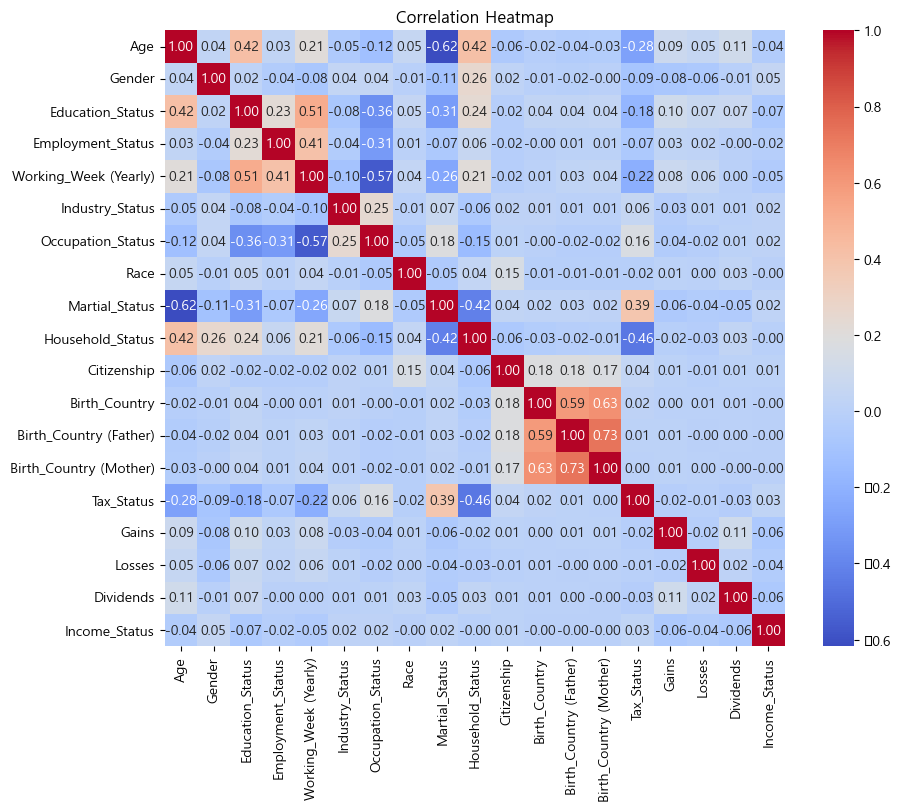

In [50]:
import seaborn as sns

# 상관 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()